In [5]:
import matplotlib.pyplot as plt

<br>
<font size=5>Простой линейный график plot</font>
<br>
<br>

Линейные графики показывают тенденцию, то есть направленное развитие.

In [6]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010] # Годы 
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3] # ВВП

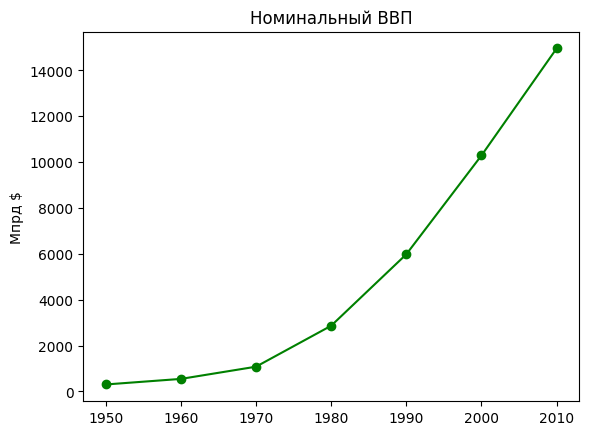

In [7]:
# Создать линейную диаграмму: годы по оси х, ВВП по оси у 
plt.plot(years, gdp, color='green', marker='o', linestyle='solid') 
# Добавить название диаграммы 
plt.title("Номинальный ВВП") 
# Добавить подпись к оси у 
plt.ylabel("Мпpд $") 
plt.show()

<br>
<font size=5>Столбчатые графики bar</font>
<br>
<br>


<br>
<b>Столбчатые графики</b> следует использовать, когда мы хотим показать как какая-нибудь величина <br>
<em>варьируется среди дискретных множеств</em>. То есть хотим увидеть не тенденцию, а просто зависимость.
<br>
<br>

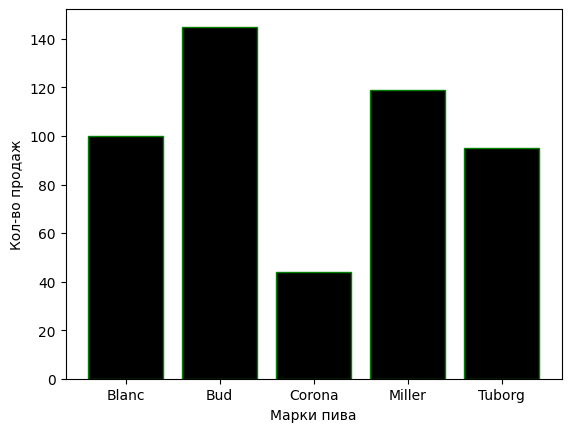

In [64]:
# Например, сколько было продано бутылок пива за месяц.

beers = ['Blanc', 'Bud', 'Corona', 'Miller', 'Tuborg']
sales = [100, 145, 44, 119, 95]

plt.bar(beers, sales, color='black', edgecolor='green')
plt.xlabel('Марки пива')
plt.ylabel('Кол-во продаж')
plt.show()


<br>
<b>Столбчатый график</b> также является хорошим вариантом выбора для построения гистрограмм сгруппированных <br>
числовых значений с целью визуального разведывания характера распределения значений.<br>
Иными словами, хотим посмотреть на какие группы можно разбить числовые значения.<br>
<br>

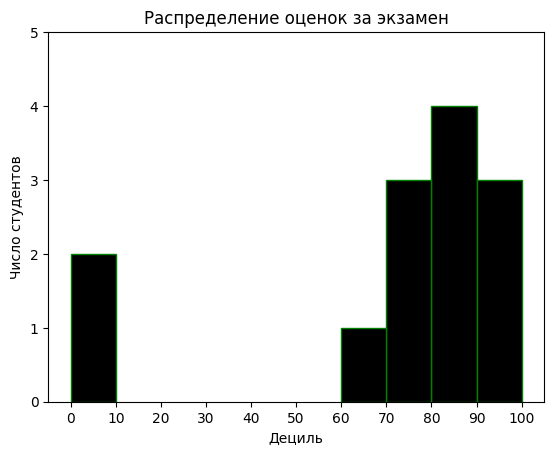

In [68]:
from collections import Counter


grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Сгруппировать оценки подецильно, но
# разместить оценки 90 и выше вместе
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
plt.bar([x + 5 for x in histogram.keys()], list(histogram.values()), 10, color='black', edgecolor='green') # Ширина каждого столбца 10
plt.axis([-5, 105, 0, 5]) # Оси x от -5 до 105, y от 0 до 5
plt.xticks([10 * i for i in range(11)])
plt.xlabel("Дециль")
plt.ylabel('Число студентов')
plt.title('Распределение оценок за экзамен')
plt.show()

<br>
<b>Дециль</b> - это количественный метод разделения набора ранжированных данных на 10 одинаково больших подразделов. Этот тип ранжирования данных выполняется в рамках многих академических и статистических исследований в области финансов и экономики. Данные могут быть ранжированы от наибольшего к наименьшему значению или наоборот.
<br>
<br>

<br>
<font size=5>Диаграмма рассеяния scatter</font>
<br>
<br>

<br>
<b>Scatter</b> тоже относится к группе графиков, которые показывают зависимость.<br>
Такая диаграмма подходит для визуализации связи между двумя сдвоенными множествами данных.<br>
Например, мы хотим увидеть связь между кол-вом выпитого кофе(в кружках) и минутами без сна.<br>
<br>

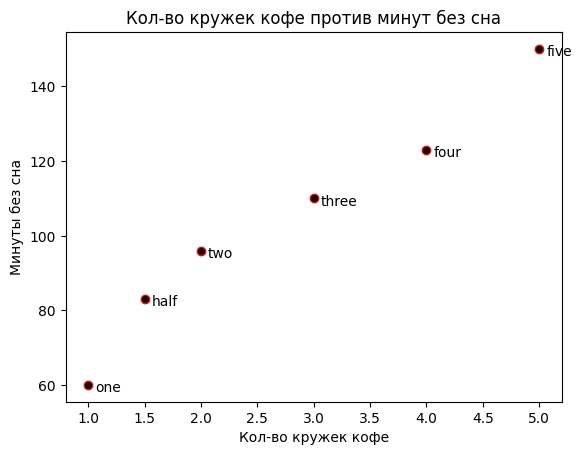

In [96]:
coffe = [1, 5, 3, 1.5, 2, 4] # Кружки кофе
minutes = [60, 150, 110, 83, 96, 123] # Минуты без чувства сна
labels = ['one', 'five', 'three', 'half', 'two', 'four']

plt.scatter(coffe, minutes, color='black', edgecolor='red')

# Назначим метку для каждой точки
for label, coffe_count, minute_count in zip(labels, coffe, minutes):
    plt.annotate(label,
                 xy=(coffe_count, minute_count), # Задать метку
                 xytext=(5, -5),                 # и немного сместить её
                 textcoords='offset points')   
plt.title('Кол-во кружек кофе против минут без сна')
plt.xlabel('Кол-во кружек кофе')                               
plt.ylabel('Минуты без сна')
plt.show()

<br>
<font size=3>Есть крутая картинка от Kaggle, которая показывает какой нужно выбирать график<font>
<br>
<br>

<img src='data/choosing.png' width="900"></img>